In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from IPython.display import Image

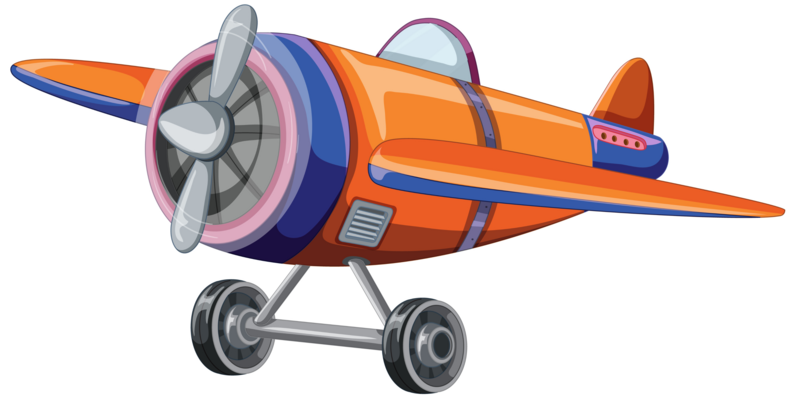

In [2]:
image_path = 'images/dataset-cover.png'
Image(filename=image_path, width=600, height=500, )

This dataset contains comprehensive information about airline flights, including details about passengers' nationalities, departure and arrival locations, passenger age groups, genders, flight statuses, and more. Our goal is to transform this raw data into meaningful and easily understandable insights

In [3]:
df = pd.read_csv('Airline.csv')
df.head()

Passenger ID First Name Last Name  Gender  Age Nationality  \
0         10856     Edithe    Leggis  Female   62       Japan   
1         43872     Elwood      Catt    Male   62   Nicaragua   
2         42633      Darby   Felgate    Male   67      Russia   
3         78493   Dominica      Pyle  Female   71       China   
4         82072        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             YCO   
2                EU         Europe      1/18/2022             GNB   
3               NAM  North America      9/16/2022             YND   
4               NAM  North America      2/25/2022             SEE   

      Pilot Name Flight Status  
0  Edithe Leggis       On Time  
1    Elwood Catt       On Time  
2  Darby Felgate       On Time  
3  Dominica Pyle       Delayed  
4    Bay Pencost       On Time

In [4]:
df.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

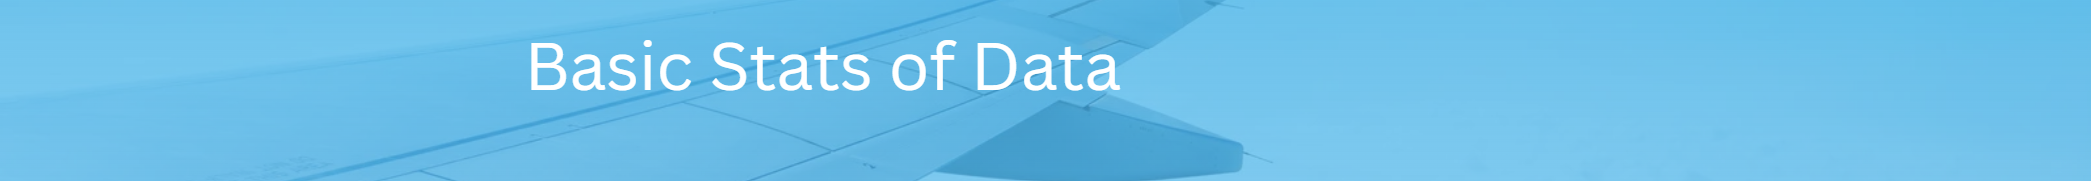

In [5]:
image_path = 'images/basic-stats.png'
Image(filename=image_path, width=1000, height=200, )

In [6]:
df.info(), print(), print(f'Data has {df.shape} rows and columns respectively')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

(None, None, None)

In [7]:
df.nunique()

Passenger ID            59871
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98610
Flight Status               3
dtype: int64

In [8]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [Passenger ID, First Name, Last Name, Gender, Age, Nationality, Airport Name, Airport Country Code, Country Name, Airport Continent, Continents, Departure Date, Arrival Airport, Pilot Name, Flight Status]
Index: []

#### Basic Analysis Result:
* The data seems to be pretty clean. 
* There are no `repeated rows`.
* There are no `Null` values.
* All the data columns are in correct data types. 
* Except `Departure Date` column, it needs to be converted into `datetime` format. 
    * But another apporach can be of dividing the departure date column into two seperate columns of date and month. THis will help us more in performing visual analysis. 

In [10]:
df[df['Passenger ID'] == 62908]

Passenger ID First Name   Last Name  Gender  Age     Nationality  \
6499          62908   Wilmette      Huffer  Female   50       Indonesia   
20480         62908       Rosy       Frake  Female   64           China   
24350         62908      Sabra     Riddles  Female   56           China   
25132         62908        Uri    Vsanelli    Male   24        Bulgaria   
30932         62908      Donny  Littleover  Female   26           Yemen   
32995         62908     Celine    Illesley  Female   38          Poland   
59605         62908     Orelee   Colleford  Female    6  Czech Republic   
66520         62908       Lily  Filippazzo  Female   53          Greece   

                     Airport Name Airport Country Code  \
6499              Tortolì Airport                   IT   
20480            Valcheta Airport                   AR   
24350  Lafayette Regional Airport                   US   
25132                Cuyo Airport                   PH   
30932            Oudomsay Airport                   LA   
32995          Joint Base Andrews                   US   
59605                Boku Airport                   PG   
66520           Desroches Airport                   SC   

                           Country Name Airport Continent     Continents  \
6499                              Italy                EU         Europe   
20480                         Argentina               SAM  South America   
24350                     United States               NAM  North America   
25132                       Philippines                AS           Asia   
30932  Lao People's Democratic Republic                AS           Asia   
32995                     United States               NAM  North America   
59605                  Papua New Guinea                OC        Oceania   
66520                        Seychelles                AF         Africa   

      Departure Date Arrival Airport        Pilot Name Flight Status  
6499      11/19/2022             TTB   Wilmette Huffer       On Time  
20480       6/4/2022             VCF        Rosy Frake       On Time  
24350      7/21/2022             LFT     Sabra Riddles     Cancelled  
25132      2/21/2022             CYU      Uri Vsanelli     Cancelled  
30932      1/28/2022             ODY  Donny Littleover     Cancelled  
32995      6/15/2022             ADW   Celine Illesley       Delayed  
59605      4/28/2022             BOQ  Orelee Colleford       Delayed  
66520     11/19/2022             DES   Lily Filippazzo       Delayed

* It can be noted, `Passenger ID` doesnot represent same passenger. As id = **62908** represents many different passengers of different nationality and Age.
* It cannot be determined what `Passenger ID` means until consulted with `DOMAIN EXPERT`

In [11]:
pd.to_datetime(df['Departure Date']).dt.year.unique()

array([2022], dtype=int64)

In [12]:
df['Dep Month'] = pd.to_datetime(df['Departure Date']).dt.month
df['Dep Day'] = pd.to_datetime(df['Departure Date']).dt.day

df.drop('Departure Date', axis=1, inplace=True)

In [13]:
df.head()

Passenger ID First Name Last Name  Gender  Age Nationality  \
0         10856     Edithe    Leggis  Female   62       Japan   
1         43872     Elwood      Catt    Male   62   Nicaragua   
2         42633      Darby   Felgate    Male   67      Russia   
3         78493   Dominica      Pyle  Female   71       China   
4         82072        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Arrival Airport     Pilot Name  \
0               NAM  North America             CXF  Edithe Leggis   
1               NAM  North America             YCO    Elwood Catt   
2                EU         Europe             GNB  Darby Felgate   
3               NAM  North America             YND  Dominica Pyle   
4               NAM  North America             SEE    Bay Pencost   

  Flight Status  Dep Month  Dep Day  
0       On Time          6       28  
1       On Time         12       26  
2       On Time          1       18  
3       Delayed          9       16  
4       On Time          2       25

* Our `Departure Date` only contains the date in format: `month/day/year`
* And the data is only of year `2022`
* Thus we drop the `Departure Date` column and add two new columns of `Day` and `month` to simplify our processing.

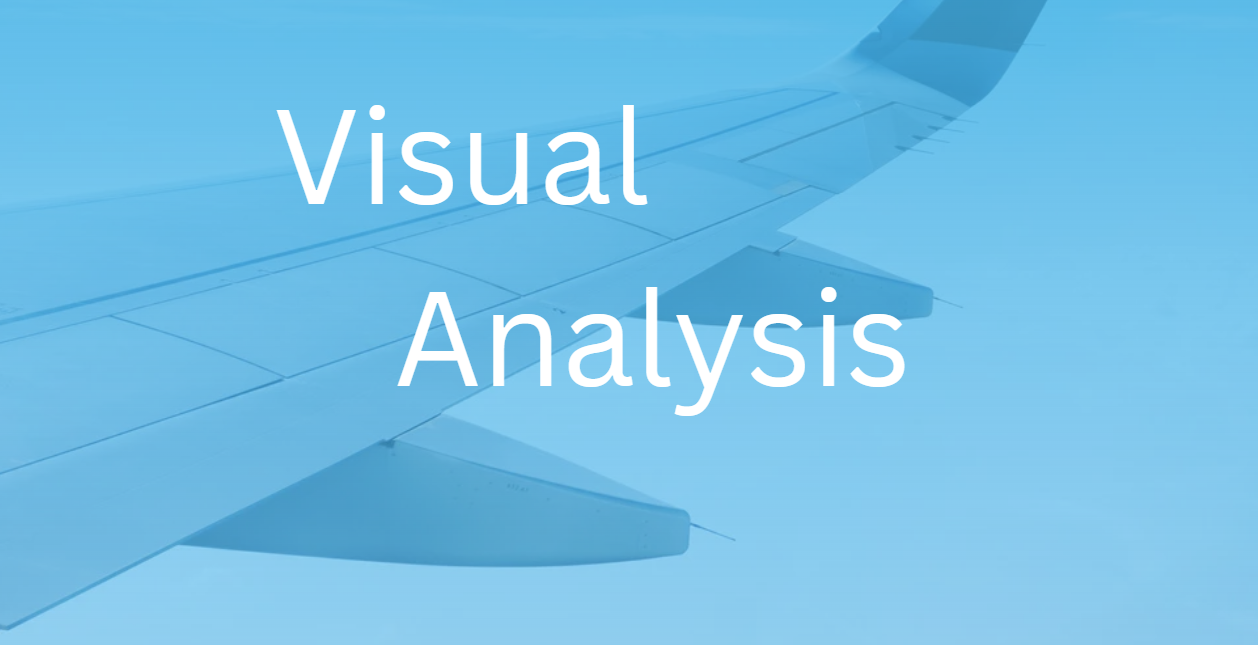

In [14]:
image_path = 'images/visual-analysis.png'
Image(filename=image_path, width=1000, height=200, )

In [15]:
nationality_dep = df.groupby('Country Name')['Dep Month'].count().reset_index()
fig = px.choropleth(
    nationality_dep,
    locations = 'Country Name',
    locationmode= 'country names',
    color = 'Dep Month',
    title = 'Number of Departures in the Year',
    color_continuous_scale= px.colors.sequential.Plasma
)

fig.show()

* Through map, we can see the regions color coded acording to how there Departure count in the year 2023

In [16]:
df['Age'].min(), df['Age'].max()

(1, 90)

* **Minimum** = Age is of 1 year
* **Maximum** = Age is of 90 year

In [17]:
gender_counts = df['Gender'].value_counts()
status_counts = df['Flight Status'].value_counts()
top_nationals = df['Nationality'].value_counts().nlargest(5)

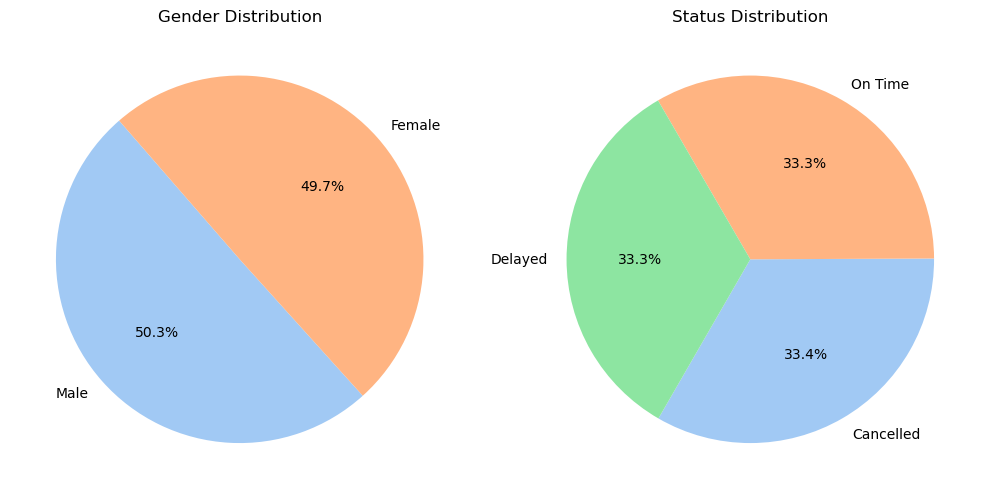

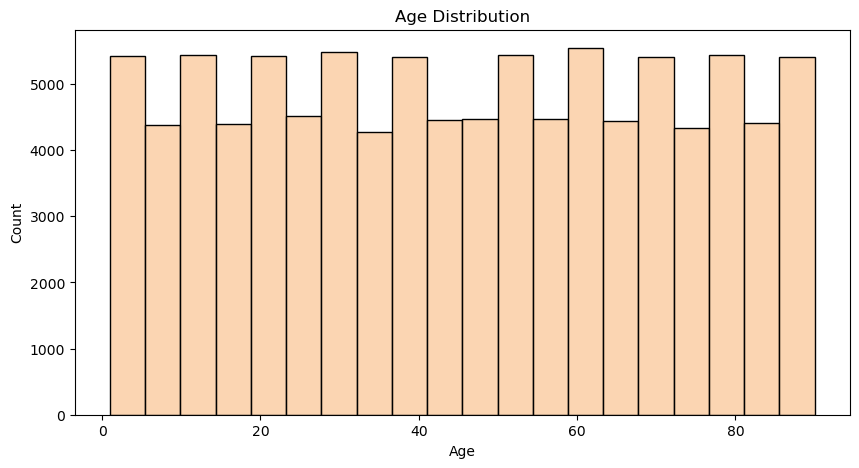

In [18]:
# Define colors using the pastel palette
colors = sns.color_palette('pastel')

# Figure 1
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# subplot 1 - Pie chart for gender counts
ax1 = axes[0]
ax1.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=131)
ax1.set_title('Gender Distribution')

# subplot 2 - Pie chart for status counts
ax2 = axes[1]
ax2.pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=240)
ax2.set_title('Status Distribution')

plt.tight_layout()

# Figure 2
plt.figure(figsize=(10,5))

# subplot 3 - Histogram for Age
sns.histplot(df['Age'], bins=20, color='#FAC898')
plt.title('Age Distribution')

plt.show()

* Through above graphs, we can see our data is not Gender biased. As there is equal ratio of `Male` and `Females` traveling.
* Our data is also not `Flight Status` biased as the ratio of fligh cancellation, on Time and Delayed is also equal.
* However, there is a diverse age group travelling onboard. As calculated above, there are 90 unique values in age column ranging from 1-90.
* To make a human mind better understand these numerical values, we can `encode` these values.

## Classifying as Age Group

* To better understand the data we can classify the passemgers travelling according to age group and Gender.
* We can break age in different age groups. As we checked above, smallest age of a passenger is `1` and largest age is of `90`
    * 1-5 = Toddler
    * 6-13 = Kids
    * 14-17 = Teenagers
    * 18-30 = Young Adults
    * 31-50 = Adults
    * 51-90 = Seniors

In [19]:
def age_class(x):
    if 0 < x < 6:
        return 'Toddler'
    elif 6 <= x < 14:
        return 'Kid'
    elif 14 <= x < 18:
        return 'Teenager'
    elif 18 <= x < 31:
        return 'Young Adult'
    elif 31 <= x < 51:
        return 'Adult'
    elif 51 <= x <= 90:
        return 'Seniors'
    
df["Ordinal Age"] = pd.to_numeric(df["Age"], errors = "coerce").apply(age_class)

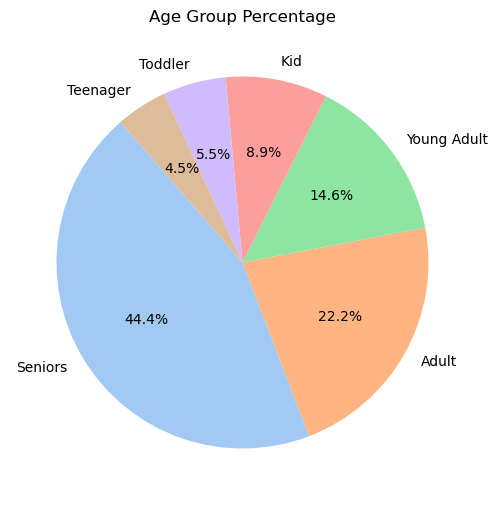

In [20]:
ordinal_age_counts = df['Ordinal Age'].value_counts()

plt.figure(figsize=(6,10))
plt.pie(ordinal_age_counts, labels=ordinal_age_counts.index, colors=colors, autopct='%1.1f%%', startangle=131)
plt.title('Age Group Percentage')
plt.show()

* Through this pie chart, we can see the data is biased towards `Seniors` and the hold a 57% share the total travelling through out the year.

* Lets first understand te other demographics of data provided

In [21]:
airport_counts = df['Airport Country Code'].value_counts().nlargest(5)

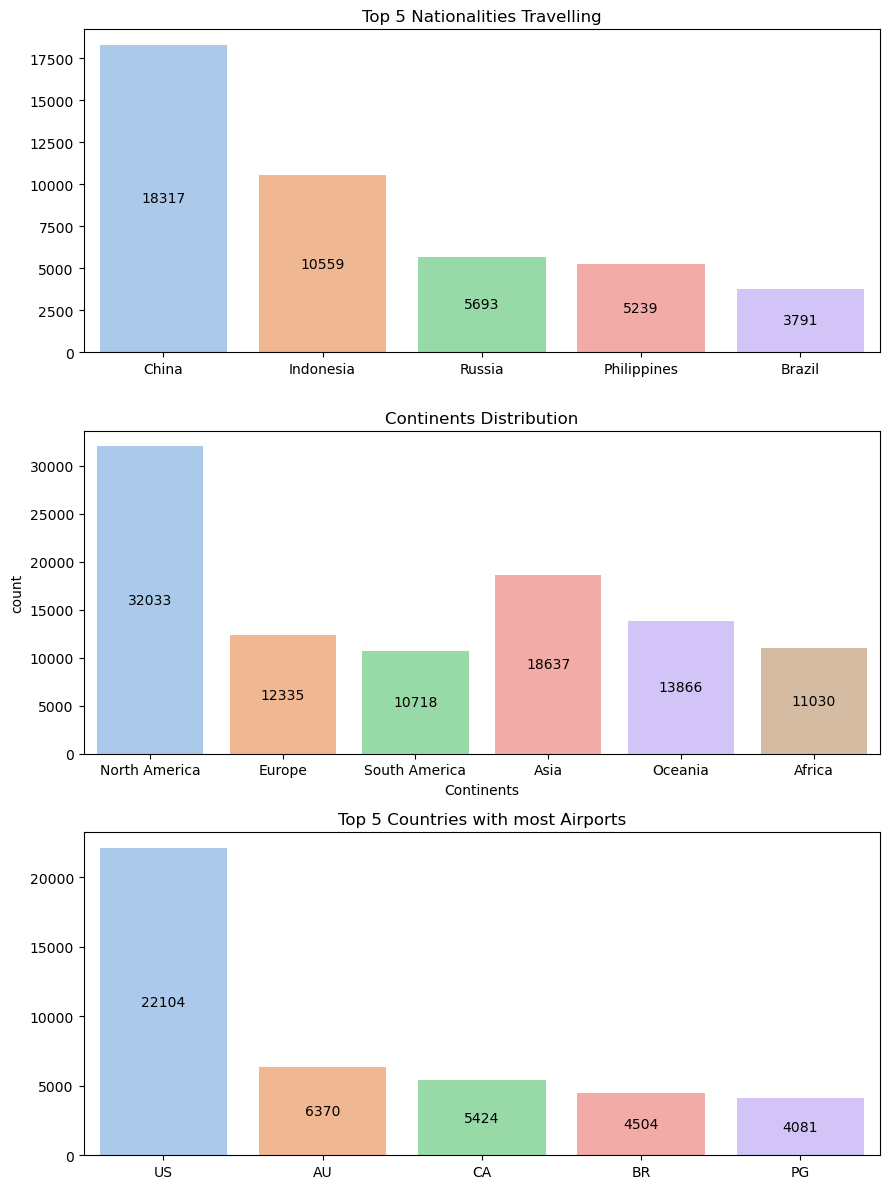

In [22]:
# Figure 1
plt.figure(figsize=(9,12))

# subplot 1 - nationality count
ax4=plt.subplot(311)
ax4 = sns.barplot(x=top_nationals.index, y=top_nationals.values, palette='pastel', ax=ax4)
ax4.set_title('Top 5 Nationalities Travelling')
for container in ax4.containers:
    ax4.bar_label(container, label_type='center')

# subplot 2 - Count plot for Continents
ax5 = plt.subplot(312)
ax5 = sns.countplot(x=df['Continents'], ax=ax5, palette='pastel')
ax5.set_title('Continents Distribution')
for container in ax5.containers:
    ax5.bar_label(container, label_type = 'center')

# subplot 3 - Count plot for Continents
ax6 = plt.subplot(313)
ax6 = sns.barplot(x=airport_counts.index, y=airport_counts.values, palette='pastel', ax=ax6)
ax6.set_title('Top 5 Countries with most Airports')
for container in ax6.containers:
    ax6.bar_label(container, label_type = 'center')

plt.tight_layout()
plt.show()

* Majority of passengers are traveling from China followed by indonesia, Russia, Phillipines..
* According to continents, 3 highest travelers are from **North America**, **Asia**, **Oceanic**
* `USA` contains the most number of airports out of all countries.

#### Reading the Data with Classified Age group

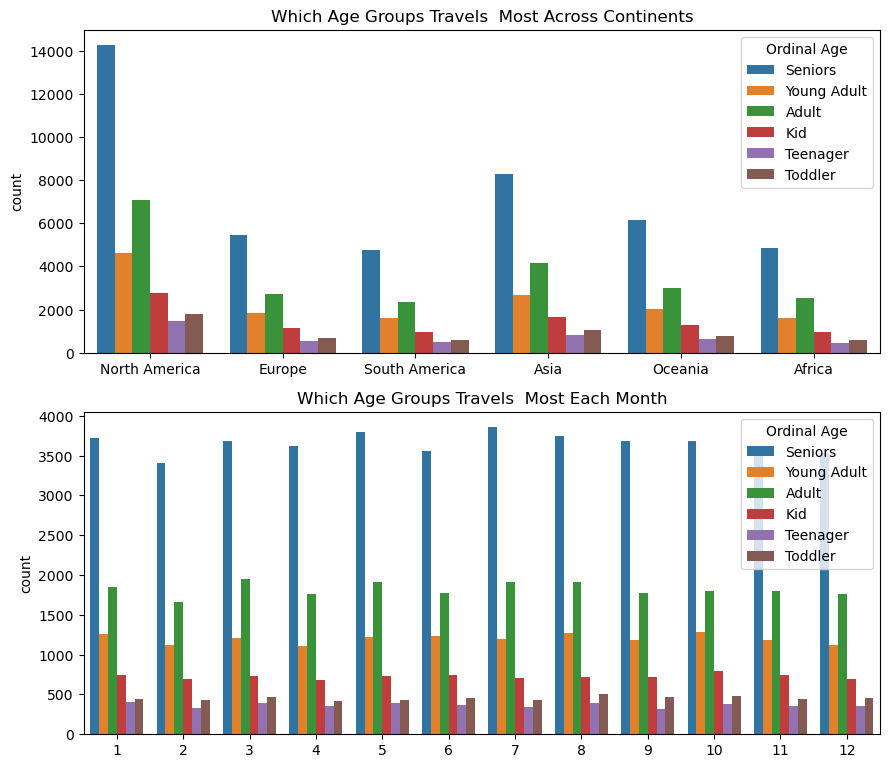

In [23]:
# Figure 1
plt.figure(figsize=(9,19))

# subplot 1 - Continents Distribution according to age
plt.subplot(511)
sns.countplot(x=df['Continents'], hue=df['Ordinal Age'])
plt.title('Which Age Groups Travels  Most Across Continents')
plt.xlabel('')

# subplot 2 - Age Group travels each month
plt.subplot(512)
sns.countplot(x=df['Dep Month'], hue=df['Ordinal Age'])
plt.title('Which Age Groups Travels  Most Each Month')
plt.xlabel('')

plt.tight_layout()
plt.show()

* As we noticed above, the data is `Senior` age group biased. And it is proved with above chart, the Senior age group has the most number. Whether we classify it as `per month` or distribute it as `Continents`.

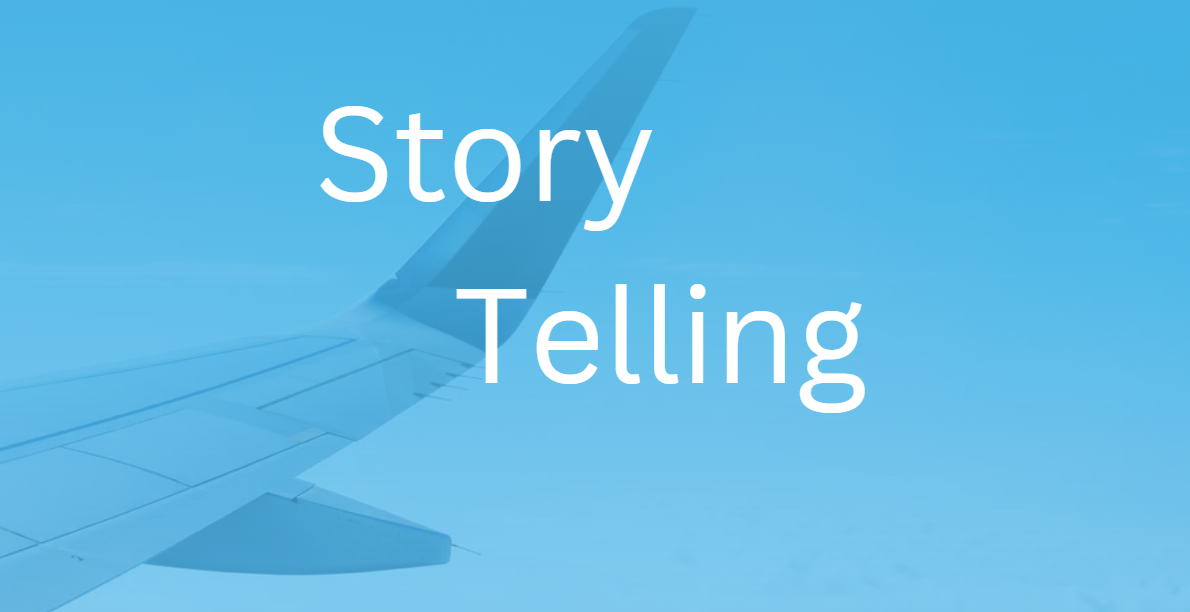

In [24]:
image_path = 'images/story-telling.png'
Image(filename=image_path, width=1000, height=200, )

### Telling the story of Pakistan Nationals

In [25]:
pak = df[df['Nationality'] == 'Pakistan']
pak.head()

Passenger ID First Name    Last Name  Gender  Age Nationality  \
95          38663    Justinn    Ishchenko  Female   54    Pakistan   
328         58421     Maryjo  Ollarenshaw  Female   66    Pakistan   
339         33961      Joice     Blakeway  Female   69    Pakistan   
610         88937       Ruby      Andrews    Male   22    Pakistan   
975         61679      Marve       Ranner    Male   37    Pakistan   

                 Airport Name Airport Country Code   Country Name  \
95   Venice Municipal Airport                   US  United States   
328    Bazhong Enyang Airport                   CN          China   
339   Amook Bay Seaplane Base                   US  United States   
610            Cowell Airport                   AU      Australia   
975      Allah Valley Airport                   PH    Philippines   

    Airport Continent     Continents Arrival Airport          Pilot Name  \
95                NAM  North America             VNC   Justinn Ishchenko   
328                AS           Asia             BZX  Maryjo Ollarenshaw   
339               NAM  North America             AOS      Joice Blakeway   
610                OC        Oceania             CCW        Ruby Andrews   
975                AS           Asia             AAV        Marve Ranner   

    Flight Status  Dep Month  Dep Day  Ordinal Age  
95        On Time          4        1      Seniors  
328       On Time          1       20      Seniors  
339       On Time          4       30      Seniors  
610       Delayed          5        7  Young Adult  
975       On Time          1        4        Adult

In [26]:
pak.shape

(532, 17)

In [27]:
pak_gender_count = pak['Gender'].value_counts()
pak_age_count = pak['Ordinal Age'].value_counts()

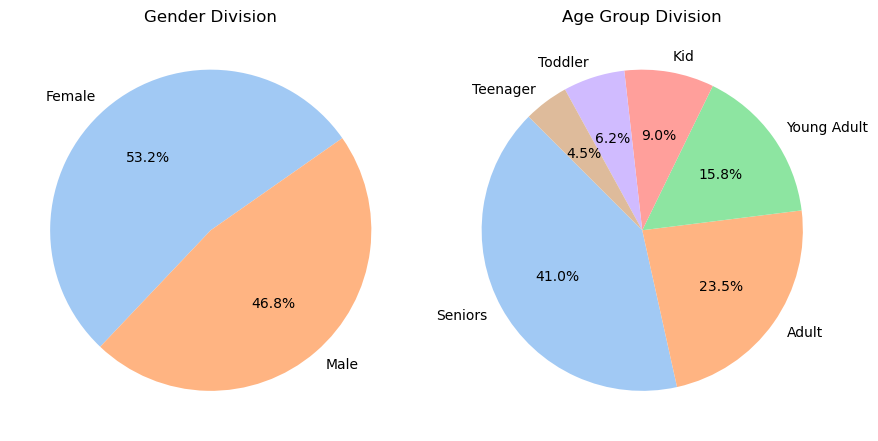

In [28]:
# figure 1
plt.figure(figsize=(9,15))

# subplot 1 - Gender ratio in Pie chart
plt.subplot(221)
plt.pie(pak_gender_count.values, labels=pak_gender_count.index, autopct='%1.1f%%', startangle=35, colors=colors)
plt.title('Gender Division')

# subplot 2 - Age Group division in Pie chart
plt.subplot(222)
plt.pie(pak_age_count.values, labels=pak_age_count.index, autopct='%1.1f%%', startangle=135, colors=colors)
plt.title('Age Group Division')

plt.tight_layout()
plt.show()

* We can see majority of `Females` are travelling from Pakistan. But males can also not be neglected as they also hold 46.8% share in travelling.
* Still, majority of those travellers are `Seniors`.

In [29]:
pak_arrival = pak['Country Name'].value_counts().nlargest(5)

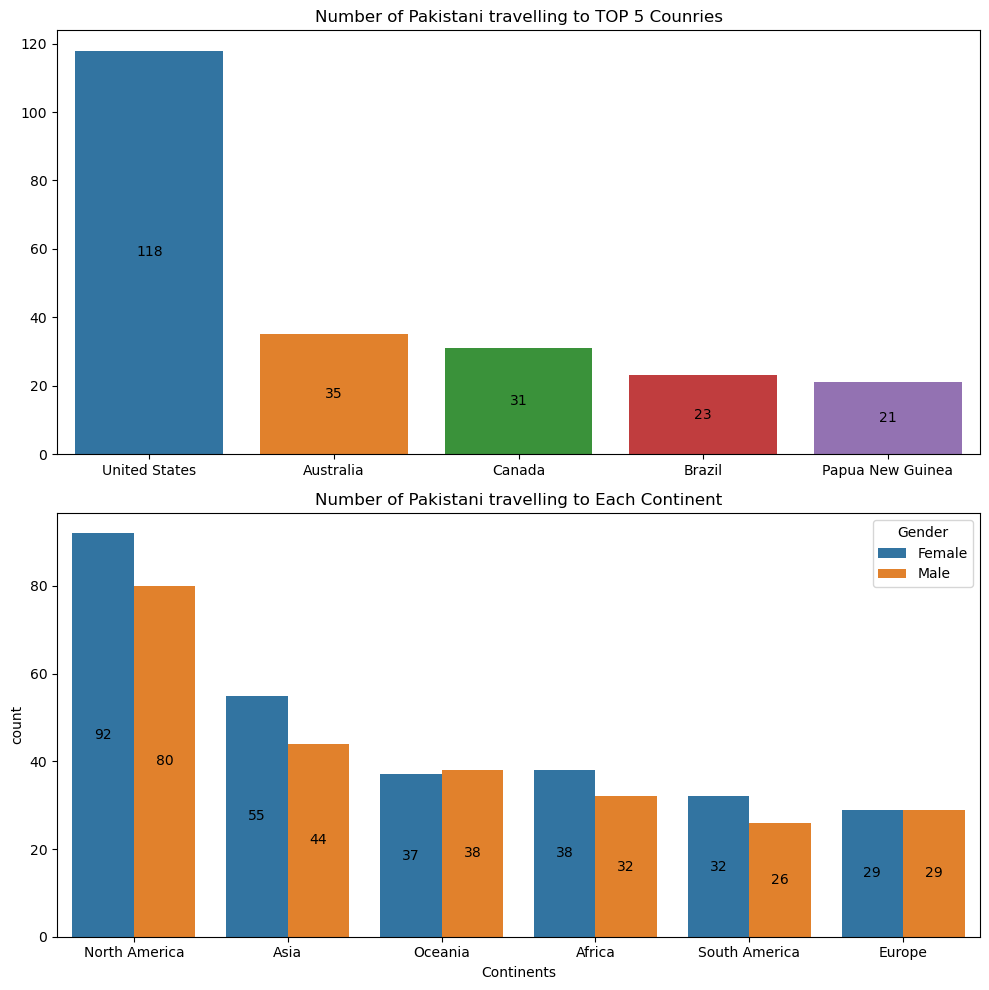

In [30]:
# Figure 1
plt.figure(figsize=(10,10))

# subplot 1 - Travelling to countries
ax1 = plt.subplot(211)
ax1 = sns.barplot(x=pak_arrival.index, y = pak_arrival.values)
for container in ax1.containers:
    ax1.bar_label(container, label_type = 'center')
ax1.set_title('Number of Pakistani travelling to TOP 5 Counries')

# subplot 2 - Continent travelling according to age
ax2 = plt.subplot(212)
ax2 = sns.countplot(x=pak['Continents'], hue=pak['Gender'])
for container in ax2.containers:
    ax2.bar_label(container, label_type = 'center')
ax2.set_title('Number of Pakistani travelling to Each Continent')

plt.tight_layout()
plt.show()

## Function Created
* Below I have created a function that takes `Nationality` as input and creates a story comprising of following data:
    1. Pie chart of Gender division
    2. Pie chart of Age Group division    
    3. Top 5 "Travelling to" countries
    4. Count of "Travelling to" Continents

In [39]:
def national(national):
    country = df[df['Nationality'] == national]
    
    print("Shape of the filtered DataFrame:", country.shape)

    # Calculate gender and age counts within the selected country
    country_gender_count = country['Gender'].value_counts()
    country_age_count = country['Ordinal Age'].value_counts()
    
    # Figure 1 with two subplots
    plt.figure(figsize=(9, 15))

    # Subplot 1 - Gender ratio in Pie chart
    plt.subplot(221)
    plt.pie(country_gender_count.values, labels=country_gender_count.index, autopct='%1.1f%%', startangle=35, colors=colors)
    plt.title('Gender Division')

    # Subplot 2 - Age Group division in Pie chart
    plt.subplot(222)
    plt.pie(country_age_count.values, labels=country_age_count.index, autopct='%1.1f%%', startangle=135, colors=colors)
    plt.title('Age Group Division')

#     plt.tight_layout()
#     plt.show()
    
    country_arrival = country['Country Name'].value_counts().nlargest(5)
    
    # Figure 2 with two subplots
    plt.figure(figsize=(10, 10))

    # Subplot 1 - Travelling to countries
    ax1 = plt.subplot(211)
    ax1 = sns.barplot(x=country_arrival.index, y=country_arrival.values)
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    ax1.set_title(f'Number of {national} national traveling to TOP 5 Countries')

    # Subplot 2 - Continent traveling according to gender
    ax2 = plt.subplot(212)
    ax2 = sns.countplot(x=country['Continents'], hue=country['Gender'])
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    ax2.set_title(f'Number of {national} national traveling to Each Continent by Gender')

    plt.tight_layout()
    plt.show()

Shape of the filtered DataFrame: (1805, 17)


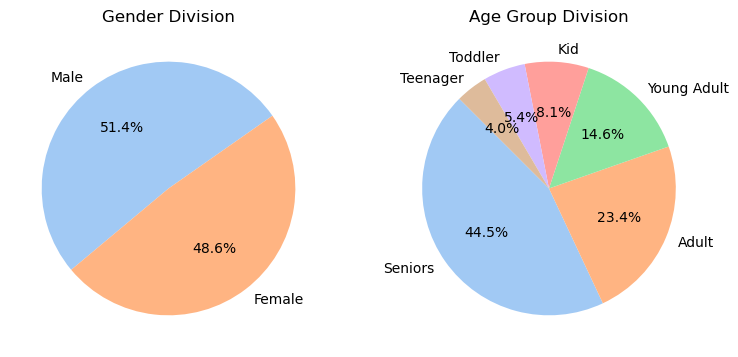

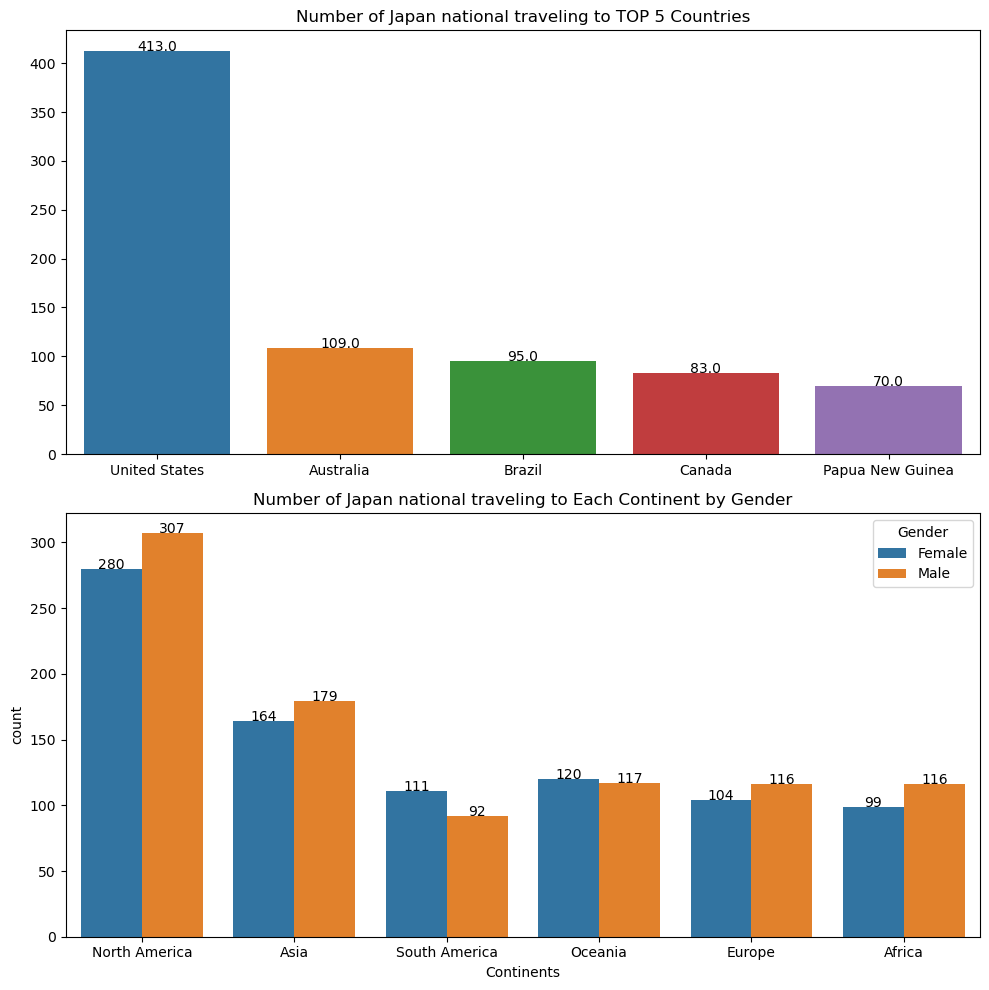

In [40]:
national('Japan')

* We can see Majority of Pakistani are travelling To `USA`.
* Each continent has majority of female Pakistanis travelling, but in `Oceania` males have a slight edge over females and in `Europe` there is equal number of males and Females travelling

In [34]:
df.to_csv('airline_clean', index=False)

In [35]:
!pip install pandas-profiling

In [36]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='airline Profile.html')